In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
data=pd.read_csv(r'D:\DATA\CreditCard\application_record.csv')

In [3]:
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
data.shape

(438557, 18)

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(438557, 18)

In [9]:
data.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [10]:
data['OCCUPATION_TYPE'].value_counts()

Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64

## using lambda to replace nan values

In [89]:
fill_na=data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [90]:
fill_na  #OCCUPATION_TYPE

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,4,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,1.0,2.0
1,5008805,4,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,1.0,2.0
2,5008806,4,1,1,0,112500.0,4,4,1,1,-21474,-1134,0,0,0,10.0,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,0,1,1,3.0,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,0,1,1,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,1,0,1,0,135000.0,1,4,2,1,-22717,365243,0,0,0,1.0,1.0
438553,6840222,4,0,0,0,103500.0,4,4,3,1,-15939,-3007,0,0,0,1.0,1.0
438554,6841878,0,0,0,0,54000.0,0,1,3,5,-8169,-372,1,0,0,3.0,1.0
438555,6842765,1,0,1,0,72000.0,1,4,1,1,-21673,365243,0,0,0,1.0,2.0


In [25]:
data['CODE_GENDER'].replace('M',0,inplace=True)
data['CODE_GENDER'].replace('F',1,inplace=True)

In [26]:
data['FLAG_OWN_CAR'].value_counts()

N    275459
Y    163098
Name: FLAG_OWN_CAR, dtype: int64

In [27]:
data['FLAG_OWN_CAR'].replace('N',0,inplace=True)
data['FLAG_OWN_CAR'].replace('Y',1,inplace=True)

In [28]:
data['FLAG_OWN_REALTY'].value_counts()

Y    304074
N    134483
Name: FLAG_OWN_REALTY, dtype: int64

In [29]:
data['FLAG_OWN_REALTY'].replace('N',0,inplace=True)
data['FLAG_OWN_REALTY'].replace('Y',1,inplace=True)

In [30]:
data['NAME_INCOME_TYPE'].value_counts()

Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64

In [48]:
le=preprocessing.LabelEncoder()
data.loc[:,'NAME_INCOME_TYPE']=le.fit_transform(data.loc[:,['NAME_INCOME_TYPE']])

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  int32  
 2   FLAG_OWN_CAR         438557 non-null  int64  
 3   FLAG_OWN_REALTY      438557 non-null  int64  
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  int32  
 7   NAME_EDUCATION_TYPE  438557 non-null  int32  
 8   NAME_FAMILY_STATUS   438557 non-null  int32  
 9   NAME_HOUSING_TYPE    438557 non-null  int32  
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [50]:
data['NAME_EDUCATION_TYPE'].value_counts()

4    301821
1    117522
2     14851
3      4051
0       312
Name: NAME_EDUCATION_TYPE, dtype: int64

In [51]:
le=preprocessing.LabelEncoder()
data.loc[:,['NAME_EDUCATION_TYPE']]=le.fit_transform(data.loc[:,['NAME_EDUCATION_TYPE']].values)

In [52]:
data['NAME_FAMILY_STATUS'].value_counts()

1    299828
3     55271
0     36532
2     27251
4     19675
Name: NAME_FAMILY_STATUS, dtype: int64

In [53]:
le=preprocessing.LabelEncoder()
data.loc[:,'NAME_FAMILY_STATUS']=le.fit_transform(data.loc[:,['NAME_FAMILY_STATUS']].values)

In [54]:
data['NAME_HOUSING_TYPE'].value_counts()

1    393831
5     19077
2     14214
4      5974
3      3922
0      1539
Name: NAME_HOUSING_TYPE, dtype: int64

In [55]:
le=preprocessing.LabelEncoder()
data.loc[:,['NAME_HOUSING_TYPE']]=le.fit_transform(data.loc[:,['NAME_HOUSING_TYPE']].values)

In [56]:
data['OCCUPATION_TYPE'].value_counts()

1.0     78241
2.0     43007
3.0     41098
4.0     35487
5.0     26090
6.0     17289
7.0     15985
8.0     13520
9.0      8076
10.0     7993
11.0     5845
12.0     3456
13.0     2140
14.0     2044
15.0     1665
16.0     1041
17.0      774
18.0      604
Name: OCCUPATION_TYPE, dtype: int64

In [93]:
data.drop('OCCUPATION_TYPE',axis=1,inplace=True)

In [95]:
data.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
CNT_FAM_MEMBERS        0
dtype: int64

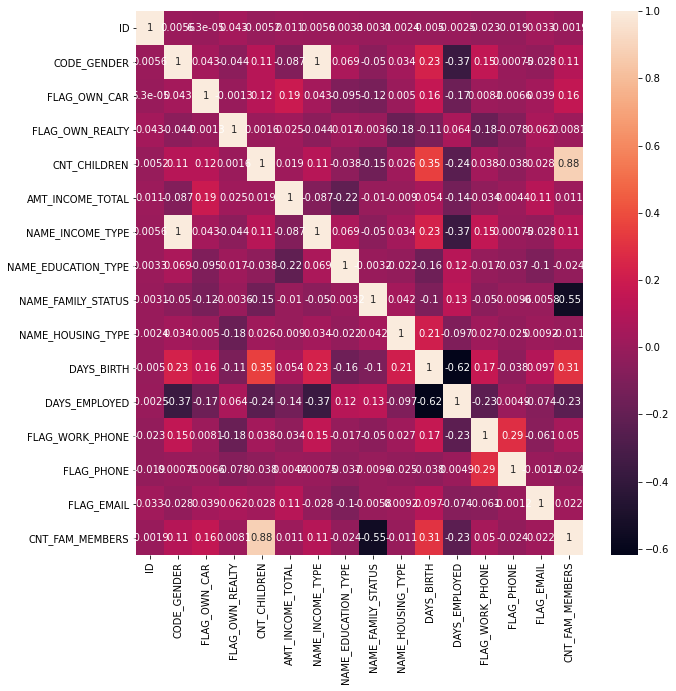

In [96]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [97]:
data.drop('FLAG_MOBIL',axis=1,inplace=True)

KeyError: "['FLAG_MOBIL'] not found in axis"

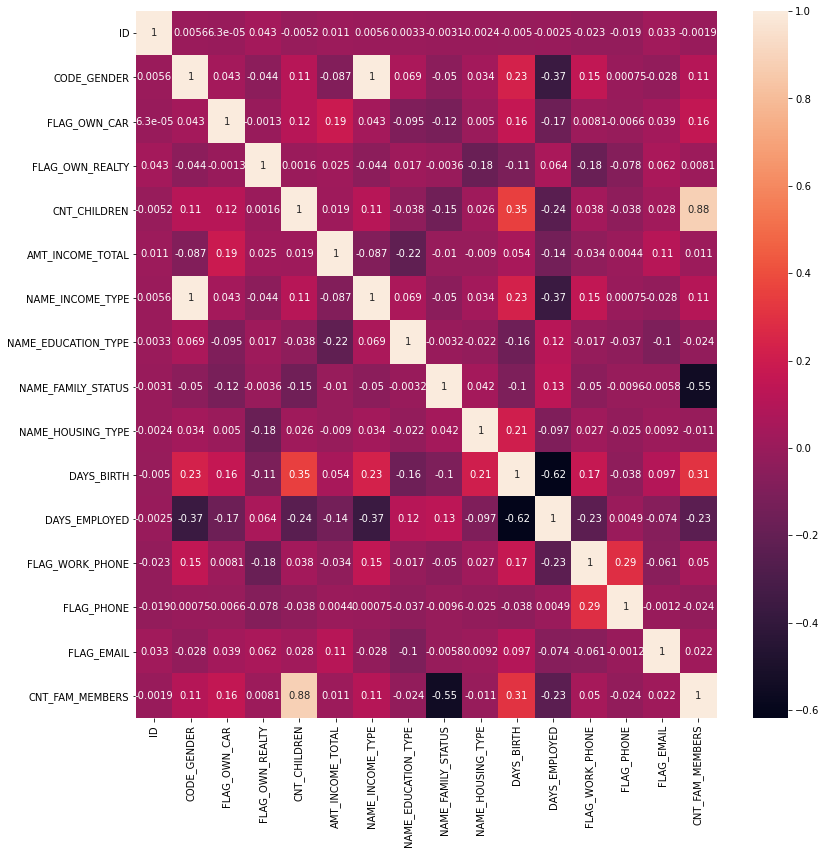

In [98]:
plt.figure(figsize=(13,13))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [99]:
cr_record=pd.read_csv(r'D:\DATA\CreditCard\credit_record.csv')

In [100]:
cr_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [101]:
data['ID'].value_counts()

7603224    2
7742853    2
7836711    2
7091721    2
7022327    2
          ..
5372264    1
6412652    1
6410605    1
6367602    1
6291456    1
Name: ID, Length: 438510, dtype: int64

In [102]:
cr_record['ID'].value_counts()

5145767    61
5116236    61
5037153    61
5002523    61
5028973    61
           ..
5149044     1
5079047     1
5137258     1
5023604     1
5023029     1
Name: ID, Length: 45985, dtype: int64

In [103]:
cr_record.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [104]:
cr_record=cr_record.dropna()

In [105]:
cr_record.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [116]:
cr_record['STATUS'].value_counts()

0    40635
1     4683
2      336
5      195
3       88
4       48
Name: STATUS, dtype: int64

In [126]:
cr_record['STATUS'].replace('C', 0, inplace=True)
cr_record['STATUS'].replace('X', 0, inplace=True)
cr_record['STATUS'].replace(2, 1, inplace=True)
cr_record['STATUS'].replace(3, 1, inplace=True)
cr_record['STATUS'].replace(4, 1, inplace=True)
cr_record['STATUS'].replace(5, 1, inplace=True)
cr_record['STATUS'] = cr_record['STATUS'].astype('int')

In [127]:
cr_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001712,0,0
2,5001713,0,0
3,5001714,0,0
4,5001715,0,0
...,...,...,...
45980,5150482,-11,0
45981,5150483,0,0
45982,5150484,0,0
45983,5150485,0,0


In [128]:
cr_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              45985 non-null  int64
 1   MONTHS_BALANCE  45985 non-null  int64
 2   STATUS          45985 non-null  int32
dtypes: int32(1), int64(2)
memory usage: 898.3 KB


In [129]:
cr_record.drop_duplicates()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001712,0,0
2,5001713,0,0
3,5001714,0,0
4,5001715,0,0
...,...,...,...
45980,5150482,-11,0
45981,5150483,0,0
45982,5150484,0,0
45983,5150485,0,0


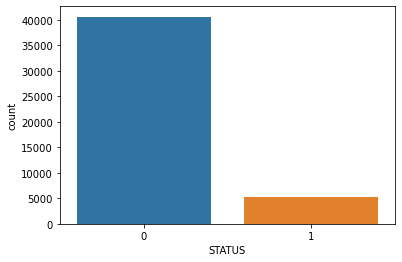

In [130]:
sns.countplot(x='STATUS',data=cr_record)
plt.show()  #note:unbalanced data

In [135]:
cr_record['STATUS'].head(50)

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     0
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    1
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
Name: STATUS, dtype: int32

In [139]:
cr_recordgb=cr_record.groupby('ID').agg(max).reset_index()
cr_recordgb

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0
...,...,...
45980,5150482,0
45981,5150483,0
45982,5150484,0
45983,5150485,0


In [136]:
cr_record.drop('MONTHS_BALANCE',axis=1,inplace=True)

In [140]:
pd=data.join(cr_recordgb.set_index('ID'),on='ID',how='inner')

In [141]:
pd

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,4,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,2.0,1
1,5008805,4,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,2.0,1
2,5008806,4,1,1,0,112500.0,4,4,1,1,-21474,-1134,0,0,0,2.0,0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,0,1,1,1.0,0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,0,1,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,5149828,4,1,1,0,315000.0,4,4,1,1,-17348,-2420,0,0,0,2.0,1
434809,5149834,0,0,1,0,157500.0,0,1,1,1,-12387,-1325,0,1,1,2.0,1
434810,5149838,1,0,1,0,157500.0,1,1,1,1,-12387,-1325,0,1,1,2.0,1
434811,5150049,4,0,1,0,283500.0,4,4,1,1,-17958,-655,0,0,0,2.0,1


In [142]:
#splitting data
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [144]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.1)

In [145]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
train_x=sd.fit_transform(train_x)
test_x=sd.transform(test_x)

In [146]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [147]:
y_pred=model.predict(test_x)
from sklearn.metrics import mean_squared_error,r2_score

In [148]:
mean_squared_error(test_y,y_pred)

0.03697748455835883

In [149]:
r2_score(test_y,y_pred)

0.9539018007087413

In [150]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(train_x,train_y)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [151]:
y_pred=model.predict(test_x)

In [152]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,test_y))

[[ 8495    27     0     0     0     0     0     0]
 [    1 23204     5     0     0     0     0     0]
 [    8     0  7818     2     0     0     0     0]
 [    5     0     0  3722     0     0     0     0]
 [    1     0     0     2   513     1     0     0]
 [    0     0     0     0     2    36    10     1]
 [    0     0     0     0     0     0     3     0]
 [    0     0     0     0     0     0     0     0]]


In [155]:
#evaluation
from sklearn.metrics import recall_score,accuracy_score,precision_score,f1_score
print('Accuracy:',accuracy_score(test_y,y_pred))
print('Recall:',recall_score(test_y,y_pred))
print('Precision:',precision_score(test_y,y_pred))
print('F1 score:',f1_score(test_y,y_pred))

Accuracy: 0.9985178766873404


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [154]:
cr_record['STATUS'].value_counts()

0    40635
1     5350
Name: STATUS, dtype: int64